In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pylab
import timeit
start = timeit.default_timer()
def kmers(read, k):
    KList=[]
    num_kmers = len(read) - k + 1
    for i in range(num_kmers):
        kmer = read[i:i+k]
        if i==0:
            KList.append(kmer)
        else:
            KList.append(kmer)    
    return KList

# input the String to be reconstructed
# input k
input1="ACCCCCACGGGAAACAGCAG"
Kmers=kmers(input1,5)

print(f"Kmers={Kmers}")
print(" ")

def FindNodesFromEdges(KmerList):
    NodesListOfLists=[]
    for edge in KmerList:
        NodesListOfLists.append([edge[:-1],edge[1:]])
        
    return NodesListOfLists

NodesListOfLists = FindNodesFromEdges(Kmers)
print(f"Nodes = {NodesListOfLists}")

Kmers=['ACCCC', 'CCCCC', 'CCCCA', 'CCCAC', 'CCACG', 'CACGG', 'ACGGG', 'CGGGA', 'GGGAA', 'GGAAA', 'GAAAC', 'AAACA', 'AACAG', 'ACAGC', 'CAGCA', 'AGCAG']
 
Nodes = [['ACCC', 'CCCC'], ['CCCC', 'CCCC'], ['CCCC', 'CCCA'], ['CCCA', 'CCAC'], ['CCAC', 'CACG'], ['CACG', 'ACGG'], ['ACGG', 'CGGG'], ['CGGG', 'GGGA'], ['GGGA', 'GGAA'], ['GGAA', 'GAAA'], ['GAAA', 'AAAC'], ['AAAC', 'AACA'], ['AACA', 'ACAG'], ['ACAG', 'CAGC'], ['CAGC', 'AGCA'], ['AGCA', 'GCAG']]


         ---   DE-BRUIJN Graph   ---         

nodes = ['ACCC', 'CCCC', 'CCCA', 'CCAC', 'CACG', 'ACGG', 'CGGG', 'GGGA', 'GGAA', 'GAAA', 'AAAC', 'AACA', 'ACAG', 'CAGC', 'AGCA', 'GCAG']
 
edges = [('ACCC', 'CCCC'), ('CCCC', 'CCCC'), ('CCCC', 'CCCA'), ('CCCA', 'CCAC'), ('CCAC', 'CACG'), ('CACG', 'ACGG'), ('ACGG', 'CGGG'), ('CGGG', 'GGGA'), ('GGGA', 'GGAA'), ('GGAA', 'GAAA'), ('GAAA', 'AAAC'), ('AAAC', 'AACA'), ('AACA', 'ACAG'), ('ACAG', 'CAGC'), ('CAGC', 'AGCA'), ('AGCA', 'GCAG')]


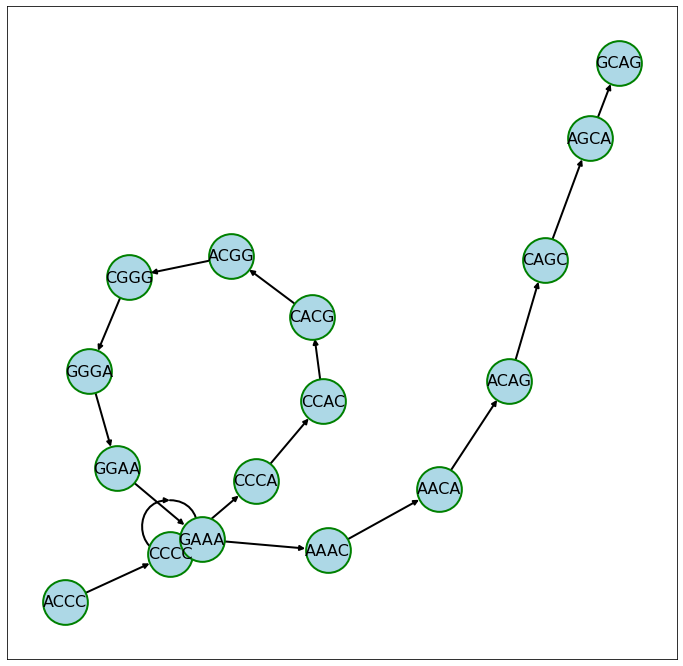

In [2]:
G = nx.MultiDiGraph()
G.add_edges_from(NodesListOfLists)
totalNodes=G.nodes()
pos = nx.spring_layout(G)
options = {
    "font_size": 16,
    "node_size": 2000,
    "node_color": "lightblue",
    "edgecolors": "green",
    "linewidths": 2,
    "width": 2,
    "edge_vmin":5
}
nodes=G.nodes()
edges=G.edges()
print("         ---   DE-BRUIJN Graph   ---         ")
print()
print(f"nodes = {nodes()}")
print(" ")
print(f"edges = {edges}")

plt.figure(2,figsize=(12,12))
nx.draw_networkx(G,pos,**options)
plt.show()

In [3]:
# converting list of lists in dictionary format
def ConvertListToDict(List):
    Dict={}
    for i in List:
        if i[0] in Dict.keys():
            newList = Dict[i[0]]
            newList.extend([i[1]])
            Dict.update({i[0]: newList})
        else:
            Dict[i[0]] = [i[1]]
    return Dict

Output=ConvertListToDict(edges)

In [4]:
def eulerian_cycle(edge_dict):
    tempo1=list(edge_dict.keys())
    current_node = tempo1[0]
    path = [current_node]
    while True:
        path.append(edge_dict[current_node][0])

        if len(edge_dict[current_node]) == 1:
            del edge_dict[current_node]
        else:
            edge_dict[current_node] = edge_dict[current_node][1:]

        if path[-1] in edge_dict:
            current_node = path[-1]
        else:
            break
    while len(edge_dict) > 0:
        for i in range(len(path)):
            if path[i] in edge_dict:
                current_node = path[i]
                cycle = [current_node]
                while True:
                    cycle.append(edge_dict[current_node][0])

                    if len(edge_dict[current_node]) == 1:
                        del edge_dict[current_node]
                    else:
                        edge_dict[current_node] = edge_dict[current_node][1:]

                    if cycle[-1] in edge_dict:
                        current_node = cycle[-1]
                    else:
                        break

                path = path[:i] + cycle + path[i+1:]
                break
    return path

print()
print(" Final Eulerian Path from the de-bruijn graph: ")
print()
path = eulerian_cycle(Output)
print ('->'.join(map(str,path)))
print(path)


 Final Eulerian Path from the de-bruijn graph: 

ACCC->CCCC->CCCC->CCCA->CCAC->CACG->ACGG->CGGG->GGGA->GGAA->GAAA->AAAC->AACA->ACAG->CAGC->AGCA->GCAG
['ACCC', 'CCCC', 'CCCC', 'CCCA', 'CCAC', 'CACG', 'ACGG', 'CGGG', 'GGGA', 'GGAA', 'GAAA', 'AAAC', 'AACA', 'ACAG', 'CAGC', 'AGCA', 'GCAG']


In [5]:
def reconstructString(List):
    String=""
    String=String+List[0]
    
    for i in range(1,len(List)):
        newWord = List[i]
        String=String+newWord[-1]
        
    return String    

In [6]:
print(f"    Original String   : {input1}")
print()
print(f" Reconstructed String : {reconstructString(path)}")
stop = timeit.default_timer()
print('Run Time: ', stop - start)

    Original String   : ACCCCCACGGGAAACAGCAG

 Reconstructed String : ACCCCCACGGGAAACAGCAG
Run Time:  0.26553437500000143
